### Libraries

In [172]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

### Importing the data

In [173]:
df_test = pd.read_csv('/Users/Kenneth S. Hansen/Dropbox/NYC Data Science/Projects/Kaggle/test.csv')
df_train = pd.read_csv('/Users/Kenneth S. Hansen/Dropbox/NYC Data Science/Projects/Kaggle/train.csv')


In [174]:
df_test.shape
df_train.shape

(1460, 81)

# Response variable - SalePrice
- Rigth / positive skewness
- The response variable is NOT normal distributed, which means that we're violating our assumption in respect no normality

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Axes(0.125,0.125;0.775x0.755)


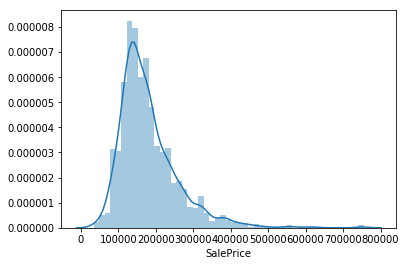

In [175]:
print(df_train['SalePrice'].describe())
#Histogram
import seaborn as sns
print(sns.distplot(df_train['SalePrice']))

#### Checking how much SalePrice deviate from a normal distribution
- Since it's very likely that I'm going to perform regressions (linear models), my depedent variables need to be "somewhat" normal distributed

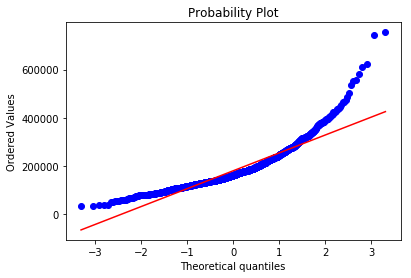

In [176]:
nf = stats.probplot(df_train['SalePrice'], plot=plt)

### Transform Response Variable - SalePrice
- Log Transform SalePrice
- Reason?

#### Log transformation

In [177]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

#### Checking the transformed response variable

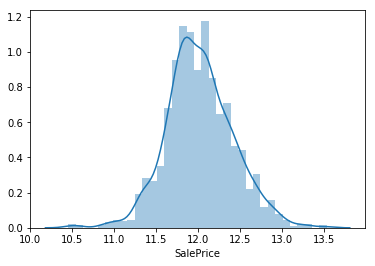

In [178]:
sns.distplot(df_train['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 10.46024211,  10.47194981,  10.54270639, ...,  13.34550693,
          13.5211395 ,  13.53447303])),
 (0.39826223081618878, 12.024050901109383, 0.99537614756366133))

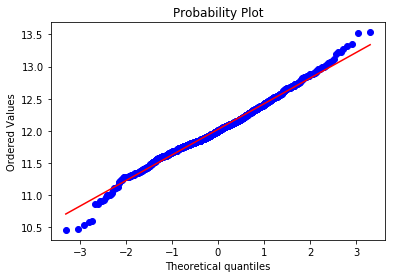

In [179]:
stats.probplot(df_train['SalePrice'], plot=plt)

# EDA
- Merging train and validate
- Impute missing values (Handling missing data)
- Categorical versus Numeric

- df.all.describe(): shows a summary of the numerical attributes

### Merging Train and Validate

In [180]:
#Obs remember to exclude response variable, SalePrice
frames = [df_train, df_test]
df_all = pd.concat(frames)

df_all.shape

(2919, 81)

### Missing values - Overview

In [181]:
#axis=0, summing each row for each column
#isnull = return an boolean depending on missing or not

#Calculat the ratio of missing values
missing = (df_all.isnull().sum(axis=0) / len(df_all)*100).sort_values(ascending=False)

#Dropping all 
missing = missing.drop(missing[missing==0].index)

missing_data = pd.DataFrame({'Missing Ratio' :missing})
missing_data


,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageCond,5.447071
GarageQual,5.447071


### Updated missing value table

In [182]:
#axis=0, summing each row for each column
#isnull = return an boolean depending on missing or not

#Calculat the ratio of missing values
missing1 = (df_all.isnull().sum(axis=0) / len(df_all)*100).sort_values(ascending=False)

#Dropping all 
missing1 = missing1.drop(missing1[missing1==0].index)

missing_data_updated = pd.DataFrame({'Missing Ratio' :missing1})
missing_data_updated

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageCond,5.447071
GarageQual,5.447071


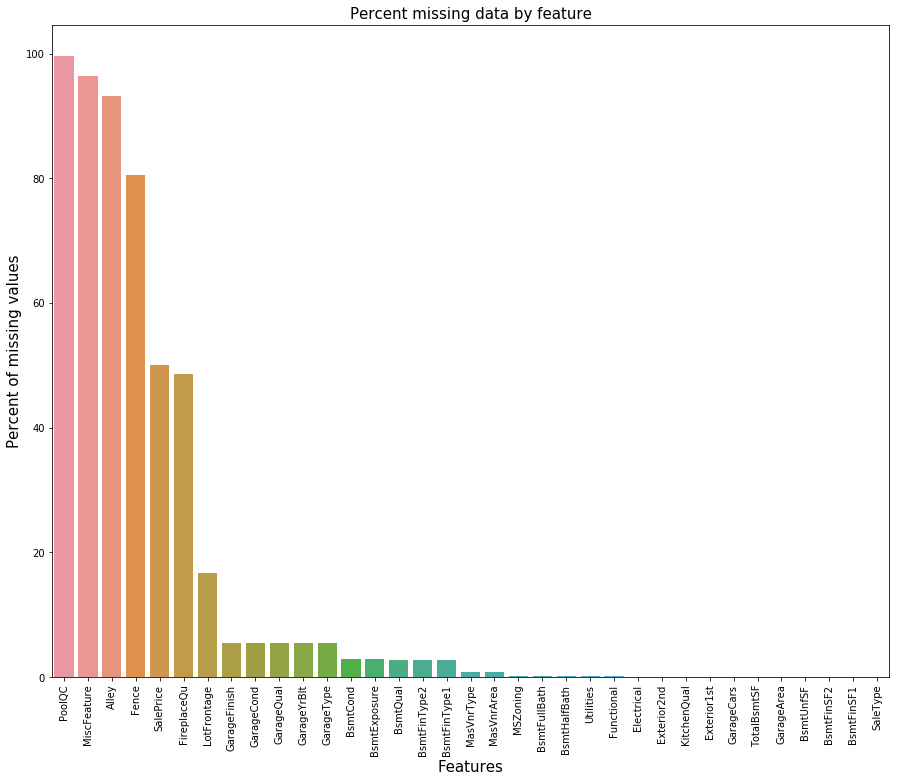

In [183]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing.index, y=missing)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Handling missing values


### Deleting variables that are more than 50% missing

In [184]:
df_all.drop(['Utilities', 'PoolArea', 'MiscFeature', 'FireplaceQu', 'Fence', 'Alley'], axis=1, inplace =True)

In [185]:
df_all.shape

(2919, 75)

## PoolQC
- I perceive these features as being "somewhat" important, and these can indeed help explain the variation in my predictor SalePrice. The risk of converting these four variables into 1 and 0 is that I lose potential infromation in the levels.
- Consider to go back and keep the levels!

In [186]:
#Replace all NA with None
List_ = ['PoolQC']
df_all[List_] = df_all[List_].fillna('None')

#Function to convert none = 0, and all other categories = 1
def replace(x):
    if x == 'None':
        return 0
    if x != 'None':
        return 1
   
 
df_all['PoolQC'] = df_all['PoolQC'].apply(replace)

print(df_all['PoolQC'].value_counts())


0    2909
1      10
Name: PoolQC, dtype: int64


### CentralAir

In [187]:
temp = pd.Series(df_all['CentralAir'].replace('Y', 1).replace('[^Y]', 0, regex=True))
df_all['CentralAir'] = temp

In [188]:
df_all['CentralAir'].value_counts()

1    2723
0     196
Name: CentralAir, dtype: int64

## 3SsnPorch, LowQualFinSF 
- Convert into binary. Either the property has a house or it hasn't

In [189]:
List_ = ['3SsnPorch', 'LowQualFinSF']
def replace1(x):
    if x == 0:
        return 0
    if x != 0:
        return 1

df_all['3SsnPorch'] = df_all['3SsnPorch'].apply(replace1)
df_all['LowQualFinSF'] = df_all['LowQualFinSF'].apply(replace1)
print(df_all['3SsnPorch'].value_counts())
print(df_all['LowQualFinSF'].value_counts())

0    2882
1      37
Name: 3SsnPorch, dtype: int64
0    2879
1      40
Name: LowQualFinSF, dtype: int64


### LotFrontage
- LotFrontage is skweded, which means that we need to transform the variable. Here, there is a lot of various options. In this case, I take the median due the fact that we have extremes values. Taking the median makes the distribution less sensitive to these extremes values compared with taking the mean for instance.
- Number of missing values: 486

In [190]:
df_all['LotFrontage'].isnull().sum()

486

#### Imputing missing values - LotFrontage
- Sqrt of area as imputing, we assume that the lot is "close" to be sqaure shaped

In [191]:
df_all.loc[df_all.LotFrontage.isnull(), 'LotFrontage'] = np.sqrt(df_all.loc[df_all.LotFrontage.isnull()].LotArea)
print(df_all['LotFrontage'].isnull().sum())

0


count    2919.000000
mean       75.373489
std        28.948335
min        21.000000
25%        60.000000
50%        72.000000
75%        89.050533
max       405.783193
Name: LotFrontage, dtype: float64


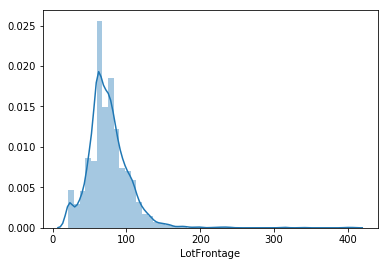

In [192]:
print(df_all['LotFrontage'].describe())
#Histogram
import seaborn as sns
sns.distplot(df_all['LotFrontage'])

### How is LotFrontage Versus SalePrice looking?

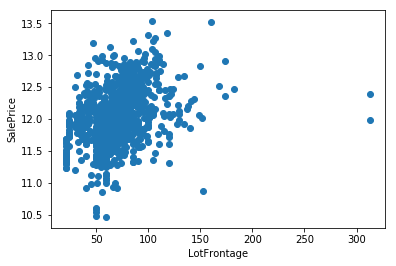

In [193]:
plt.scatter(x = 'LotFrontage', y = 'SalePrice', data = df_train)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')

### Garage Quality, Garage Type, Garage Finish, Garage Cond
- Only five procent missing, and I consider to drop since GarageCars and GarageArea probably are better indicators
- Therefore, I replace NA with None

In [194]:
List_Garage = ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']
df_all[List_Garage].isnull().sum()

GarageType      157
GarageFinish    159
GarageCond      159
GarageQual      159
dtype: int64

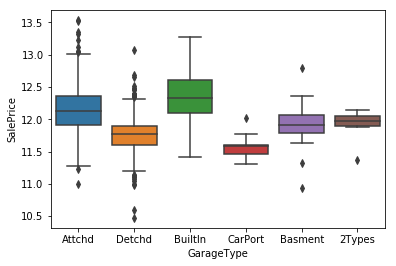

In [195]:
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = df_all)

In [196]:
#Rplace missing values with None for Garage Quality, Garage Type, Garage Finish & Garage Condition
df_all[List_Garage] = df_all[List_Garage].fillna('None')

#confirm that 159 missing values were substitued with None
df_all[List_Garage].isnull().sum()

GarageType      0
GarageFinish    0
GarageCond      0
GarageQual      0
dtype: int64

In [197]:
## dubble checking, what NA was replace with None

In [198]:
df_all['GarageQual'] = df_all['GarageQual'].fillna('None')
#confirm that 159 missing values were substitued with None
df_all['GarageQual'].value_counts()

TA      2604
None     159
Fa       124
Gd        24
Po         5
Ex         3
Name: GarageQual, dtype: int64

### GarageYrBlt, Garage Area, Garage Cars
- Replace missing with 0.
- Seems like it is the same observations that are missing
- GarageQuality and GarageYrBlt, this is probably due to the fact that the variable GarageCars = 0 means no cars in such garage, and therefore GarageYrBlt and GarageQuality is not represented!

In [199]:
List_Garage1 = ['GarageYrBlt', 'GarageArea', 'GarageCars']
df_all[List_Garage1].isnull().sum()

GarageYrBlt    159
GarageArea       1
GarageCars       1
dtype: int64

In [200]:
df_all[List_Garage1] = df_all[List_Garage1].fillna(0)
#confirm that NA was replaced with zero
df_all[List_Garage1].isnull().sum()

GarageYrBlt    0
GarageArea     0
GarageCars     0
dtype: int64

### Creating a new variable GarageMissing, indicating that the property do NOT have a house

In [201]:
temp = pd.Series(df_all['GarageQual'].replace('None', 1).replace('[^None]', 0, regex=True))
df_all['GarageMissing'] = temp

### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath
- All numeric values 
- Missing values means no basement
- replace with zero

In [202]:
List_Bsmt_numeric = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
df_all[List_Bsmt_numeric].isnull().sum()
#Observe that we only have few missing values

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

In [203]:
#Replace NA with zero
df_all[List_Bsmt_numeric] = df_all[List_Bsmt_numeric].fillna(0)
#confirm
df_all[List_Bsmt_numeric].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
- Categorical variables
- NA means that there is NO basement
- Therefore replace NA with None

In [204]:
#Number of missing values for each category
List_Bsmt_categorical = ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2']
df_all[List_Bsmt_categorical].isnull().sum()

BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinType2    80
dtype: int64

In [205]:
#Imputing missing values
df_all[List_Bsmt_categorical] = df_all[List_Bsmt_categorical].fillna('None')
#Confrim that NA was replaced
df_all[List_Bsmt_categorical].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

## Creating a new variable BasementMissing, indicating that the property do NOT have an Basement

In [206]:
temp = pd.Series(df_all['BsmtQual'].replace('None', 1).replace('[^None]', 0, regex=True))
df_all['BasementMissing'] = temp

In [207]:
df_all['BasementMissing'].value_counts()

0    2838
1      81
Name: BasementMissing, dtype: int64

### MasVnrArea
- Numeric variable
- 0 indicate no sqaure meters of "murværk". Since MasVnrType Na means that the house has no "murværk"

In [208]:
#Number of missing
df_all['MasVnrArea'].isnull().sum()

23

In [209]:
df_all['MasVnrArea'] = df_all['MasVnrArea'].fillna(0)
#confirm that Na was replaced with 0
df_all['MasVnrArea'].isnull().sum()

0

### MasVnrType
- Categorical variable where NA means no "murværk"

In [210]:
df_all['MasVnrType'].isnull().sum()

24

In [211]:
df_all['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [212]:
df_all['MasVnrType'] = df_all['MasVnrType'].fillna("None") 
#confirm that Na was replaced with 0
df_all['MasVnrType'].isnull().sum()

0

### MSZoning
- Only four missing observations.
- Observe that RL is significantly more represented that the 3 other MSZonings
- mode should be appropriate in this case. Mode replaces missing with the value that is represented most
- Recall that 0 is rowwise, while 1 is column

In [213]:
X = df_all['MSZoning'].value_counts()
(X)/(X).sum() * 100

RL         77.701544
RM         15.780446
FV          4.768439
RH          0.891938
C (all)     0.857633
Name: MSZoning, dtype: float64

In [214]:
print(df_all['MSZoning'].value_counts())
print(df_all['MSZoning'].isnull().sum())

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
4


In [215]:
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])
#Confirm that the replacement occured succesfully.
print(df_all['MSZoning'].value_counts())
print(df_all['MSZoning'].isnull().sum())

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
0


### Functional
- Categorical variable with 8 cateogories
- describtion: : Home functionality (Assume typical unless deductions are warranted)
- Taking the same approach as for MSzoning, type is clearly most represented!
- Mode replacement


In [216]:
print(df_all['Functional'].value_counts())
print(df_all['Functional'].isnull().sum())

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
2


In [217]:
df_all['Functional'] = df_all['Functional'].fillna(df_all['Functional'].mode()[0])
#Confirm that the replacement occured succesfully.
print(df_all['Functional'].value_counts())
print(df_all['Functional'].isnull().sum())

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
0


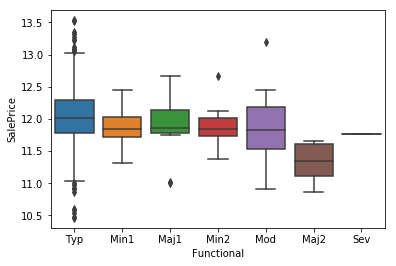

In [218]:
sns.boxplot(x = 'Functional', y = 'SalePrice', data = df_all)

### Exterior1st and Exterior2nd
- Exterior1st: Exterior covering on house
- Exteriors2nd: Exterior covering on house (if more than one material)
- Categorical variable with 17 categories
- Exterior1st, only ONE missing value
- Ezterior2nd, only ONE missing value
- Same argument as before, using MODE for replacement!


In [219]:
print(df_all['Exterior1st'].value_counts())
print(df_all['Exterior1st'].isnull().sum())

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64
1


In [220]:
#mode replacement
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])

In [221]:
print(df_all['Exterior2nd'].value_counts())
print(df_all['Exterior2nd'].isnull().sum())

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64
0


#### PUTTING THE LAST 5 LEVELS INTO ONE CALLED "OTHER" (reason is to bring down the number of dummy columns we create when do dummy encoding).

In [222]:
df_all.Exterior2nd.replace("Stone", "Other", inplace=True)
df_all.Exterior2nd.replace("AsphShn", "Other", inplace=True)
df_all.Exterior2nd.replace("CBlock", "Other", inplace=True)

### Kitchen Quality
- Categorical with 5 categories
- Only one missing value
- Mode replacement

In [223]:
print(df_all['KitchenQual'].value_counts())
print(df_all['KitchenQual'].isnull().sum())

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64
1


In [224]:
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])

### SaleType
- Categorical with 10 categories
- Only one missing value
- Mode replacement again

In [225]:
print(df_all['SaleType'].value_counts())
print(df_all['SaleType'].isnull().sum())

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64
1


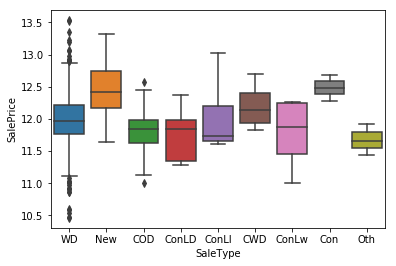

In [226]:
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = df_all)

In [227]:
# We consider this as a paramount variable, so we will not aggregate or any other modifications...

In [228]:
# Mode Replacement
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

### Electrical
- Categorical with 5 categories
- Only one missing value
- Mode replacement

In [229]:
print(df_all['Electrical'].value_counts())
print(df_all['Electrical'].isnull().sum())

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
1


In [230]:
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])

## MSSubClass, MoSold

In [231]:
df_all = df_all.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [232]:
df_all.shape

(2919, 77)

## Dummies

In [233]:
dummy_df = pd.get_dummies(df_all, drop_first=True)

In [234]:
dummy_df.shape

(2919, 265)

# NUMERIC VARIABLES

## Correlation -  Examining Correlation between predictor

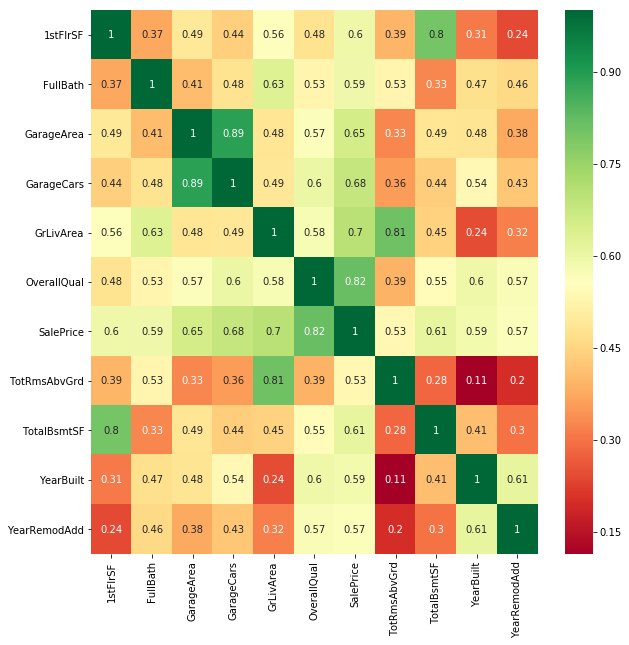

In [235]:
fig, ax = plt.subplots()
fig.set_size_inches(10.0, 10.0)
corrmat = df_all.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
g = sns.heatmap(df_all[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Outliars!

#### GrLivArea
- Observe a few outliers
- Remove observations with a GrLivArea above 4000

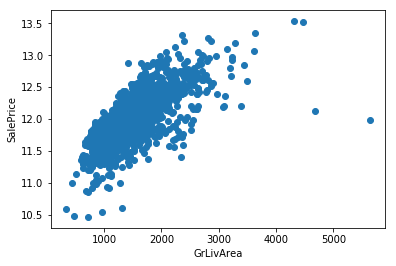

In [236]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df_train)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

#### Dropping GrLivArea > 4000 & SalePrice < 12.5 (TrainingSet)

In [237]:
df_all.loc[(df_all['GrLivArea']>4000) & (df_all['SalePrice']< 12.5)]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,GarageMissing,BasementMissing
523,3138,1538,0,3,1Fam,TA,Gd,2260.0,0.0,GLQ,...,0,Pave,11,3138.0,208,2007,2008,2007,0,0
1298,4692,950,0,3,1Fam,TA,Gd,5644.0,0.0,GLQ,...,0,Pave,12,6110.0,214,2008,2008,2008,0,0


In [238]:
#df_all1 = df_all.drop(['523', '1298'])
df_all = df_all[df_all.Id != 524]
df_all = df_all[df_all.Id != 1299]
#Confirming that we removed the two observations
df_all.shape

(2917, 77)

In [239]:
#test set is untouced!
df_train.shape

(1460, 81)

##### Confirming that the observations was dropped

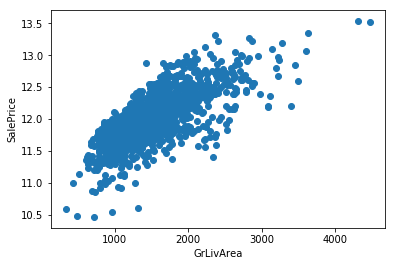

In [240]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df_all)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

### TRANSFORMATION OF SKEWED VARIABLE

## Extracting numeric features

In [241]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
from scipy.stats import skew, kurtosis
from scipy.special import boxcox1p

numerical_features = ['1stFlrSF',
                      "2ndFlrSF",
                      "GrLivArea",
                      "LotArea",
                      "OpenPorchSF",
                      "WoodDeckSF"]

train_num = df_all[numerical_features]

skewness = train_num.apply(lambda x: skew(x) )
skewness = skewness[abs(skewness) > 0.2]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
print(skewness)

df_all[numerical_features] = np.log(df_all[numerical_features] + 1)

6 skewed numerical features to log transform
1stFlrSF        1.257286
2ndFlrSF        0.861556
GrLivArea       1.068750
LotArea        13.109495
OpenPorchSF     2.529358
WoodDeckSF      1.844792
dtype: float64


In [242]:
#df_all[numerical_features].skew()

## New Features

In [243]:
# 1: Total square feet
df_all['TotLivArea'] = df_all.GrLivArea + df_all.TotalBsmtSF

# 2: # Total number of bathrooms
df_all['TotalBath'] = df_all['BsmtFullBath'] + (0.5 * df_all['BsmtHalfBath']) + df_all['FullBath'] + (0.5 * df_all['HalfBath'])

# 3: BsmtUnFinRatio
df_all['BsmtUnFinRatio'] = df_all.BsmtUnfSF / df_all.TotalBsmtSF 
df_all['BsmtUnFinRatio'] = df_all['BsmtUnFinRatio'].fillna(0)

# 4: AreaPerCar
df_all['AreaPerCar'] = df_all.GarageArea / df_all.GarageCars 
df_all['AreaPerCar'] = df_all['AreaPerCar'].fillna(0)


# 5: AvgRoomSize 
df_all['AvgRoomSize'] = df_all.GrLivArea / df_all.TotRmsAbvGrd

# SHOULD WE KEEP INTERACTION TERMS, I.E. NOT EXLUDE THEM?
# 6: Condition should be reduced

In [244]:
#df_all['OverallCond'] = df_all.OverallCond.replace({
  #  1: 1, 2: 1, 3:1 , 4:1, 5:2, 6:3, 7:3, 8:3, 9:3, 10:3})
#df_all["OverallGrade"] = df_all["OverallQual"] * df_all["OverallCond"]
#df_all['GarageScore'] = df_all.GarageCond * df_all.GarageQual * df_all.GarageArea
#df_all['FireScore'] = df_all.Fireplaces * df_all.FireplaceQu
#df_all["Overallscore"] = df_all["OverallGrade"]  * df_all['GrLivArea']
#df_all["ExterGrade"] = df_all["ExterQual"] * df_all["ExterCond"]
#df_all["KitchenScore"] = df_all["KitchenAbvGr"] * df_all["KitchenQual"]
#df_all["TotalBath"] = df_all["BsmtFullBath"] + (0.5 * df_all["BsmtHalfBath"]) + \
#df_all["FullBath"] + (0.5 * df_all["HalfBath"])
#df_all["AllSF"] = df_all["GrLivArea"] + df_all["TotalBsmtSF"]
#df_all["AllPorchSF"] = df_all["OpenPorchSF"] + df_all["EnclosedPorch"] + \
#df_all["3SsnPorch"] + df_all["ScreenPorch"]

### Splitning the dataset back into training and validate

#### Spliting the data back into training and validate<

In [245]:
df_clean_test=dummy_df[dummy_df.SalePrice.isnull()]
df_clean_train=dummy_df[dummy_df.SalePrice.notnull()]

In [246]:
#Ensure you have 1459 observations
df_clean_test.shape

(1459, 265)

In [247]:
#train
df_clean_train.to_csv('cleaned_train_dummy.csv')

In [248]:
#test
df_clean_test.to_csv('cleaned_test_dummy.csv')

### Without dummifying data

In [249]:
df_clean_test=df_all[df_all.SalePrice.isnull()]
df_clean_train=df_all[df_all.SalePrice.notnull()]

#### Saving the training and test set and excel.csv

In [250]:
df_clean_test.to_csv('cleaned_test.csv')
df_clean_train.to_csv('cleaned_train.csv')